In [1]:
#TMDB file
#Set Up Dependencies
import pandas as pd
import requests
import numpy as np
import scipy as sp
import pprint as pp
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Open and import csv files

movie_tmdb = pd.read_csv("cleaned_df5.csv")

movie_tmdb

,tmdb_id,imdb_id,original_language,original_title,genres,release_date,video,adult,popularity,tmdb_rating_avg,...,netflix_provider,stan_provider,amazon_provider,imdb_rating,imdb_votes,iso_country,country_name,budget,revenue,runtime
0,134803,tt0221431,en,The Newcomers,"Drama,Family",1/01/2000,False,False,2.339,3.9,...,No,No,Yes,4.8,465,US,United States of America,0,0,90
1,65397,tt0249840,en,Nightfall,"Drama,Sci-Fi,Thriller",1/01/2000,False,False,1.555,3.3,...,No,Yes,No,3.3,463,US,United States of America,0,0,85
2,44388,tt0139388,en,It Had to Be You,"Comedy,Romance",1/01/2000,False,False,9.691,6.2,...,No,No,Yes,5.6,2265,US,United States of America,0,0,90
3,10384,tt0134983,en,Supernova,"Horror,Sci-Fi,Thriller",14/01/2000,False,False,13.377,5.0,...,No,No,Yes,4.8,18336,CH,Switzerland,90000000,14828081,91
4,77434,tt0197096,en,What's Cooking?,"Comedy,Drama,Romance",20/01/2000,False,False,3.519,5.7,...,No,No,Yes,6.8,2811,US,United States of America,0,0,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5348,575322,tt5656994,en,Звёздный разум,"Adventure,Sci-Fi,Thriller",6/01/2022,False,False,925.268,5.6,...,No,No,Yes,3.4,3040,CY,Cyprus,0,0,98
5349,825808,tt11209212,en,See for Me,"Crime,Drama,Mystery",7/01/2022,False,False,63.155,6.2,...,Yes,No,No,5.8,5113,CA,Canada,0,0,92
5350,916740,tt13978306,en,Brazen,"Crime,Drama,Mystery",13/01/2022,False,False,61.998,4.9,...,Yes,No,No,4.1,12594,US,United States of America,0,0,94
5351,760926,tt6020800,en,Gold,"Action,Adventure,Thriller",13/01/2022,False,False,70.686,6.3,...,No,Yes,No,5.4,10031,AU,Australia,6500000,176048,97


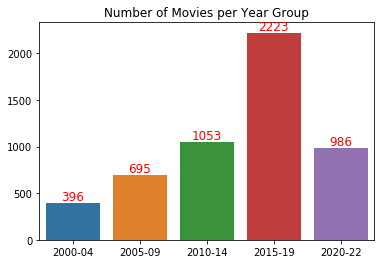

<Figure size 3600x720 with 0 Axes>

In [3]:
movie_tmdb['release_date'].dtype #Initial data type of release dates are in String Object.

movie_tmdb['release_date'] = pd.to_datetime(movie_tmdb['release_date']) #Change to datetime data

#group by the following years: (2000-20004, 2005-2009, 2010-2014, 2015-2019, 2020-2022)

group_one = movie_tmdb[(movie_tmdb['release_date'] >= '2000-01-01') & (movie_tmdb['release_date'] <= '2004-12-31')]
ct_yr1= group_one.count()

group_two =  movie_tmdb[(movie_tmdb['release_date'] >= '2005-01-01') & (movie_tmdb['release_date'] <= '2009-12-31')]
ct_yr2 = group_two.count()

group_three =  movie_tmdb[(movie_tmdb['release_date'] >= '2010-01-01') & (movie_tmdb['release_date'] <= '2014-12-31')]
ct_yr3= group_three.count()

group_four =  movie_tmdb[(movie_tmdb['release_date'] >= '2015-01-01') & (movie_tmdb['release_date'] <= '2019-12-31')]
ct_yr4 = group_four.count()

group_five =  movie_tmdb[(movie_tmdb['release_date'] >= '2020-01-01') & (movie_tmdb['release_date'] <= '2022-12-31')]
ct_yr5 = group_five.count()

total_count = pd.DataFrame({
    "2000": [ct_yr1["original_title"]],
    "2005": [ct_yr2["original_title"]],
    "2010": [ct_yr3["original_title"]],
    "2015": [ct_yr4["original_title"]],
    "2020": [ct_yr5["original_title"]],

})

total_count

## How many movies have been produced in each group?
total_ct = total_count.sum()
Year = ["2000-04", "2005-09", "2010-14", "2015-19" ,"2020-22"]
data = total_count
sns.barplot(x=Year, y=total_ct, data=data).set(title="Number of Movies per Year Group")
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), fontsize=12, color="red", ha="center", va="bottom")

plt.figure(figsize=(50,10))
plt.show()


In [5]:
# Sort movie dataset according to higest values

highest_budget = movie_tmdb.sort_values(by="budget", ascending=False, ignore_index=True)

highest_budget.drop(highest_budget.index[500:], inplace=True)

#Count the genres by splitting the column

budget_genres = highest_budget.assign(genres=highest_budget.genres.str.split(",")).explode('genres')


#Plot the genre of Top 500 Budgeted Films with according to their IMDB Rating

b1 = sns.stripplot(data=budget_genres_netflix.sort_values(by="genres"), y="imdb_rating", x="budget", hue="genres", palette="deep", dodge= True, native_scale=True)
b1.ticklabel_format(style="sci", axis="x")
b1.set(xlabel=None, ylabel=None)
b1.set_title("Top 500 Highest Budgeted Films Streaming on Netflix from 2000-22")
sns.move_legend(b1, "upper left", bbox_to_anchor=(1, 1), title=None )

plt.ylabel("IMDB Ratings")
plt.xlabel("USD")
plt.figure(figsize=(15,7))
plt.tight_layout()

plt.show()

NameError: name 'budget_genres_netflix' is not defined

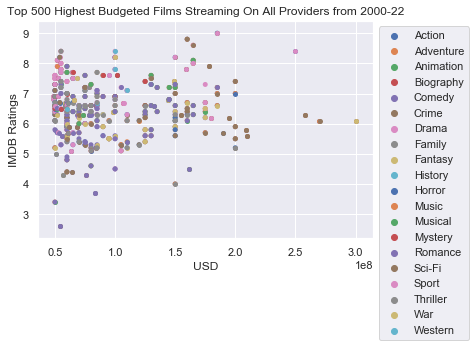

<Figure size 1080x504 with 0 Axes>

In [ ]:
# Sort movie dataset according to higest values

highest_budget = movie_tmdb.sort_values(by="budget", ascending=False, ignore_index=True)

highest_budget.drop(highest_budget.index[500:], inplace=True)

#Count the genres by splitting the column

budget_genres = highest_budget.assign(genres=highest_budget.genres.str.split(",")).explode('genres')
budget_genres_netflix = budget_genres[budget_genres['netflix_provider']=='Yes']

#Plot the genre of Top 500 Budgeted Films with according to their IMDB Rating

b1 = sns.stripplot(data=budget_genres_netflix.sort_values(by="genres"), y="imdb_rating", x="budget", hue="genres", palette="deep", dodge= True, native_scale=True)
b1.ticklabel_format(style="sci", axis="x")
b1.set(xlabel=None, ylabel=None)
b1.set_title("Top 500 Highest Budgeted Films Streaming On All Providers from 2000-22")
sns.move_legend(b1, "upper left", bbox_to_anchor=(1, 1), title=None )

plt.ylabel("IMDB Ratings")
plt.xlabel("USD")
plt.figure(figsize=(15,7))
plt.tight_layout()

plt.show()

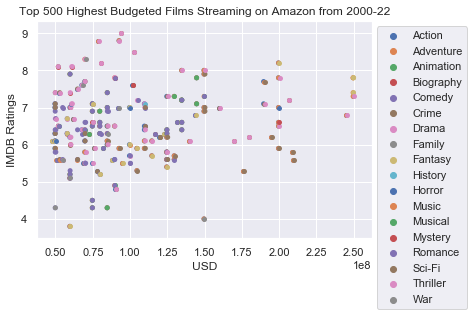

<Figure size 1080x504 with 0 Axes>

In [ ]:
# Sort movie dataset according to higest values

highest_budget = movie_tmdb.sort_values(by="budget", ascending=False, ignore_index=True)

highest_budget.drop(highest_budget.index[500:], inplace=True)

#Count the genres by splitting the column

budget_genres = highest_budget.assign(genres=highest_budget.genres.str.split(",")).explode('genres')
budget_genres_amazon = budget_genres[budget_genres['amazon_provider']=='Yes']

#Plot the genre of Top 500 Budgeted Films with according to their IMDB Rating

b1 = sns.stripplot(data=budget_genres_amazon.sort_values(by="genres"), y="imdb_rating", x="budget", hue="genres", palette="deep", dodge= True, native_scale=True)
b1.ticklabel_format(style="sci", axis="x")
b1.set(xlabel=None, ylabel=None)
b1.set_title("Top 500 Highest Budgeted Films Streaming on Amazon from 2000-22")
sns.move_legend(b1, "upper left", bbox_to_anchor=(1, 1), title=None )

plt.ylabel("IMDB Ratings")
plt.xlabel("USD")
plt.figure(figsize=(15,7))
plt.tight_layout()

plt.show()

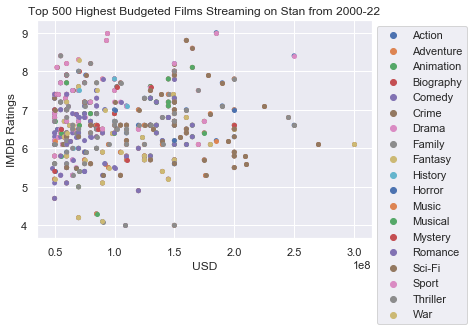

<Figure size 1080x504 with 0 Axes>

In [ ]:
# Sort movie dataset according to higest values

highest_budget = movie_tmdb.sort_values(by="budget", ascending=False, ignore_index=True)

highest_budget.drop(highest_budget.index[500:], inplace=True)

#Count the genres by splitting the column

budget_genres = highest_budget.assign(genres=highest_budget.genres.str.split(",")).explode('genres')
budget_genres_stan = budget_genres[budget_genres['stan_provider']=='Yes']

#Plot the genre of Top 500 Budgeted Films with according to their IMDB Rating

b1 = sns.stripplot(data=budget_genres_stan.sort_values(by="genres"), y="imdb_rating", x="budget", hue="genres", palette="deep", dodge= True, native_scale=True)
b1.ticklabel_format(style="sci", axis="x")
b1.set(xlabel=None, ylabel=None)
b1.set_title("Top 500 Highest Budgeted Films Streaming on Stan from 2000-22")
sns.move_legend(b1, "upper left", bbox_to_anchor=(1, 1), title=None )

plt.ylabel("IMDB Ratings")
plt.xlabel("USD")
plt.figure(figsize=(15,7))
plt.tight_layout()

plt.show()

In [ ]:
plt.subplot(1,3)


In [7]:
highest_budget

,tmdb_id,imdb_id,original_language,original_title,genres,release_date,video,adult,popularity,tmdb_rating_avg,...,netflix_provider,stan_provider,amazon_provider,imdb_rating,imdb_votes,iso_country,country_name,budget,revenue,runtime
0,141052,tt0974015,en,Justice League,"Action,Adventure,Fantasy",2017-11-15,False,False,72.215,6.1,...,Yes,Yes,No,6.1,455470,US,United States of America,300000000,657926987,120
1,1452,tt0348150,en,Superman Returns,"Action,Adventure,Sci-Fi",2006-06-28,False,False,33.489,5.7,...,Yes,Yes,No,6.1,284905,US,United States of America,270000000,391081192,154
2,559,tt0413300,en,Spider-Man 3,"Action,Adventure,Sci-Fi",2007-01-05,False,False,71.786,6.4,...,Yes,No,No,6.3,594587,US,United States of America,258000000,890871626,139
3,57158,tt1170358,en,The Hobbit: The Desolation of Smaug,"Adventure,Fantasy",2013-11-12,False,False,82.847,7.6,...,No,No,Yes,7.8,667751,NZ,New Zealand,250000000,958400000,161
4,370172,tt2382320,en,No Time to Die,"Action,Adventure,Thriller",2021-09-29,False,False,102.745,7.4,...,No,No,Yes,7.3,403470,GB,United Kingdom,250000000,774153007,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,446791,tt5294550,en,All the Money in the World,"Biography,Crime,Drama",2017-12-21,False,False,14.331,6.5,...,No,Yes,No,6.8,86385,US,United States of America,50000000,56996304,132
496,500682,tt1860242,en,The Highwaymen,"Biography,Crime,Drama",2019-03-15,False,False,20.483,6.7,...,Yes,No,No,6.9,93146,US,United States of America,49000000,0,133
497,198184,tt1823672,en,Chappie,"Action,Crime,Drama",2015-04-03,False,False,59.835,6.8,...,Yes,No,No,6.8,254493,US,United States of America,49000000,104399548,120
498,1636,tt0230030,en,Bedazzled,"Comedy,Fantasy",2000-10-19,False,False,39.574,6.0,...,No,No,Yes,6.1,106217,DE,Germany,48000000,90383208,93


In [8]:
#Separate the genres for easier counts
movie_genre = movie_tmdb.assign(genres=movie_tmdb.genres.str.split(",")).explode('genres')

movie_genre

,tmdb_id,imdb_id,original_language,original_title,genres,release_date,video,adult,popularity,tmdb_rating_avg,...,netflix_provider,stan_provider,amazon_provider,imdb_rating,imdb_votes,iso_country,country_name,budget,revenue,runtime
0,134803,tt0221431,en,The Newcomers,Drama,2000-01-01,False,False,2.339,3.9,...,No,No,Yes,4.8,465,US,United States of America,0,0,90
0,134803,tt0221431,en,The Newcomers,Family,2000-01-01,False,False,2.339,3.9,...,No,No,Yes,4.8,465,US,United States of America,0,0,90
1,65397,tt0249840,en,Nightfall,Drama,2000-01-01,False,False,1.555,3.3,...,No,Yes,No,3.3,463,US,United States of America,0,0,85
1,65397,tt0249840,en,Nightfall,Sci-Fi,2000-01-01,False,False,1.555,3.3,...,No,Yes,No,3.3,463,US,United States of America,0,0,85
1,65397,tt0249840,en,Nightfall,Thriller,2000-01-01,False,False,1.555,3.3,...,No,Yes,No,3.3,463,US,United States of America,0,0,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351,760926,tt6020800,en,Gold,Adventure,2022-01-13,False,False,70.686,6.3,...,No,Yes,No,5.4,10031,AU,Australia,6500000,176048,97
5351,760926,tt6020800,en,Gold,Thriller,2022-01-13,False,False,70.686,6.3,...,No,Yes,No,5.4,10031,AU,Australia,6500000,176048,97
5352,926899,tt11703050,en,The House,Animation,2022-01-14,False,False,78.270,7.1,...,Yes,No,No,6.8,17508,GB,United Kingdom,0,0,97
5352,926899,tt11703050,en,The House,Comedy,2022-01-14,False,False,78.270,7.1,...,Yes,No,No,6.8,17508,GB,United Kingdom,0,0,97


In [9]:

#Top 10 highest rated genre per 5 years (2000-20004, 2005-2009, 2010-2014, 2015-2019, 2020-2023)

(movie_genre['release_date'].dtype) #Initial data type of release dates are in String Object.

#Changing release date as datetime datatype for easier extraction of required data
movie_genre['release_date'] = pd.to_datetime(movie_genre['release_date'])

movie_genre #In this df, genre has been separated

#group Genre by the following years: (2000-20004, 2005-2009, 2010-2014, 2015-2019, 2020-2022)

groupyr_one = movie_genre[(movie_genre['release_date'] >= '2000-01-01') & (movie_genre['release_date'] <= '2004-12-31')]
genre_yr1= groupyr_one.count()

groupyr_two =  movie_genre[(movie_genre['release_date'] >= '2005-01-01') & (movie_genre['release_date'] <= '2009-12-31')]
genre_yr2 = groupyr_two.count()

groupyr_three =  movie_genre[(movie_genre['release_date'] >= '2006-01-01') & (movie_genre['release_date'] <= '2014-12-31')]
genre_yr3= groupyr_three.count()

groupyr_four =  movie_genre[(movie_genre['release_date'] >= '2015-01-01') & (movie_genre['release_date'] <= '2019-12-31')]
genre_yr4 = groupyr_four.count()

groupyr_five =  movie_genre[(movie_genre['release_date'] >= '2020-01-01') & (movie_genre['release_date'] <= '2022-12-31')]
genre_yr5 = groupyr_five.count()

genre_count = pd.DataFrame({
    "2000": [genre_yr1["tmdb_id"]],
    "2005": [genre_yr2["tmdb_id"]],
    "2010": [genre_yr3["tmdb_id"]],
    "2015":[genre_yr4["tmdb_id"]],
    "2020":[genre_yr5["tmdb_id"]]
})



In [10]:
#Sort the year groups by highest rating from IMDB and only keep top10

##Group 1: 2000 - 2004
top_imdb_one = groupyr_one.sort_values(by='imdb_rating', ascending=False, ignore_index=True)
top100_yr1 = top_imdb_one.drop(range(100,396))

##Group 2: 2005-2009
top_imdb_two = groupyr_two.sort_values(by='imdb_rating', ascending=False, ignore_index=True)
top100_yr2 = top_imdb_two.drop(range(100,695))

##Group 3: 2010-2014
top_imdb_three = groupyr_three.sort_values(by='imdb_rating', ascending=False, ignore_index=True)
top100_yr3 = top_imdb_three.drop(range(100,1640))

##Group 4: 2015-2019
top_imdb_four = groupyr_four.sort_values(by='imdb_rating', ascending=False, ignore_index=True)
top100_yr4 = top_imdb_four.drop(range(100,2223))

##Group 5: 2020-2022
top_imdb_five = groupyr_five.sort_values(by='imdb_rating', ascending=False, ignore_index=True)
top100_yr5 = top_imdb_five.drop(range(100,986))



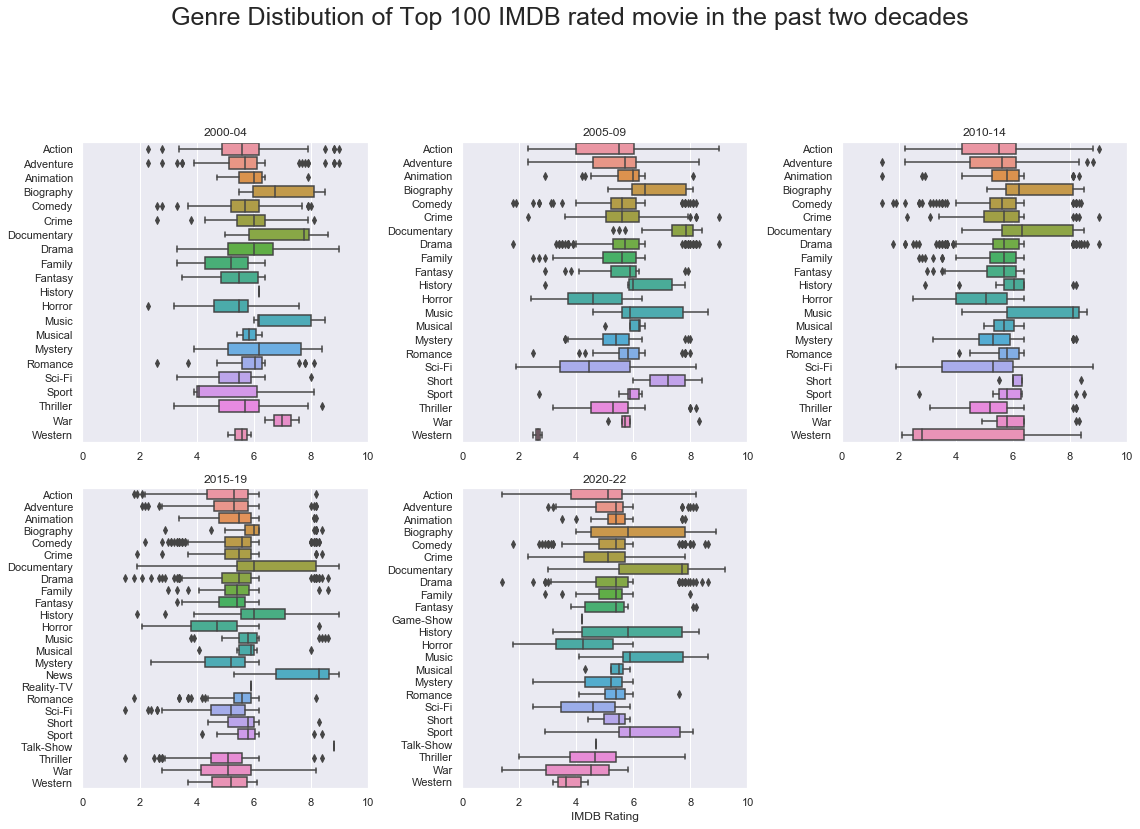

In [39]:
#Category Plots
#Top 100 IMDB films according to Year group
sns.set()

f, axes = plt.subplots(2,3, figsize=(16,10))

sns.boxplot(data=top100_yr1.sort_values(by='genres'), y="genres", x="imdb_rating", ax=axes[0,0]).set(title= "2000-04")
sns.boxplot(data=top100_yr2.sort_values(by='genres'), y="genres", x="imdb_rating", ax=axes[0,1]).set(title= "2005-09")
sns.boxplot(data=top100_yr3.sort_values(by='genres'), y="genres", x="imdb_rating", ax=axes[0,2]).set(title= "2010-14")
sns.boxplot(data=top100_yr4.sort_values(by='genres'), y="genres", x="imdb_rating", ax=axes[1,0]).set(title= "2015-19")
sns.boxplot(data=top100_yr5.sort_values(by='genres'), y="genres", x="imdb_rating", ax=axes[1,1]).set(title= "2020-22")

f.suptitle("Genre Distibution of Top 100 IMDB rated movie in the past two decades", fontsize=25, y=1.15 )

#Remove xlabel="imdb_rating" and ylabel="genres", remove last plot with no data

axes[0,0].set(xlabel=None, ylabel=None,xlim=(0,10))
axes[0,1,].set(xlabel=None, ylabel=None,xlim=(0,10))
axes[0,2].set(xlabel=None, ylabel=None,xlim=(0,10))
axes[1,0].set(xlabel=None, ylabel=None,xlim=(0,10))
axes[1,1].set(xlabel="IMDB Rating", ylabel=None,xlim=(0,10))
axes[1,2].set_visible(False)

plt.tight_layout()

In [12]:
#Netflix Data Only for Genres
netflix = movie_tmdb.query("netflix_provider == 'Yes'")
netflix_clean = netflix.drop(columns= ["stan_provider", "amazon_provider"])

#Stan Data Only
stan = movie_tmdb.query("stan_provider == 'Yes'")
stan_clean = stan.drop(columns= ["netflix_provider", "amazon_provider"])

#Amazon Data only
amazon = movie_tmdb.query("amazon_provider == 'Yes'")
amazon_clean = amazon.drop(columns= ["netflix_provider", "stan_provider"])

In [13]:
#Separate the genres for easier counts
netflix_genre = netflix_clean.assign(genres=netflix_clean.genres.str.split(",")).explode('genres')
stan_genre = stan_clean.assign(genres=stan_clean.genres.str.split(",")).explode('genres')
amazon_genre = amazon_clean.assign(genres=amazon_clean.genres.str.split(",")).explode('genres')


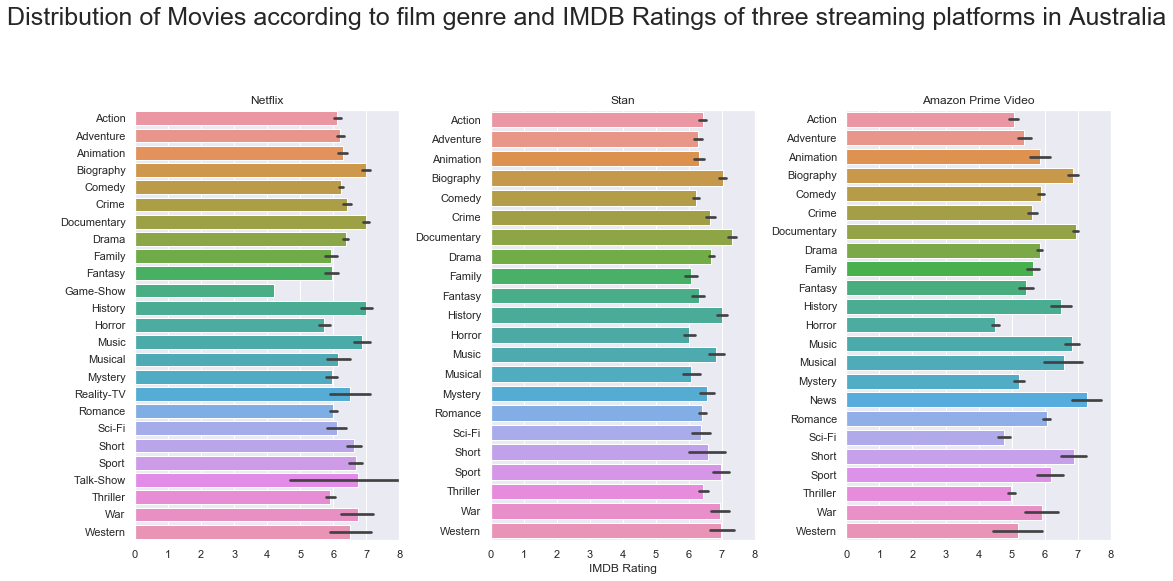

In [20]:
#Compare genre movies from 3 providers

fig, axes = plt.subplots(1,3, figsize=(15, 7))

sns.barplot(data=netflix_genre.sort_values(by='genres'), y="genres", x="imdb_rating", ax=axes[0]).set_title("Netflix")  
sns.barplot(data=stan_genre.sort_values(by='genres'), y="genres", x="imdb_rating", ax=axes[1]).set_title("Stan")
sns.barplot(data=amazon_genre.sort_values(by='genres'), y="genres", x="imdb_rating", ax=axes[2]).set_title("Amazon Prime Video")

fig.suptitle("Distribution of Movies according to film genre and IMDB Ratings of three streaming platforms in Australia", fontsize=25, y=1.15 )

#Remove xlabel="imdb_rating" and ylabel="genres"
axes[0].set(xlabel=None, ylabel=None, xlim=(0,8))
axes[1].set(xlabel="IMDB Rating", ylabel= None,xlim=(0,8))
axes[2].set(xlabel=None, ylabel=None,xlim=(0,8))

plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Film Runtime and their IMDB Rating across three streaming plaforms')

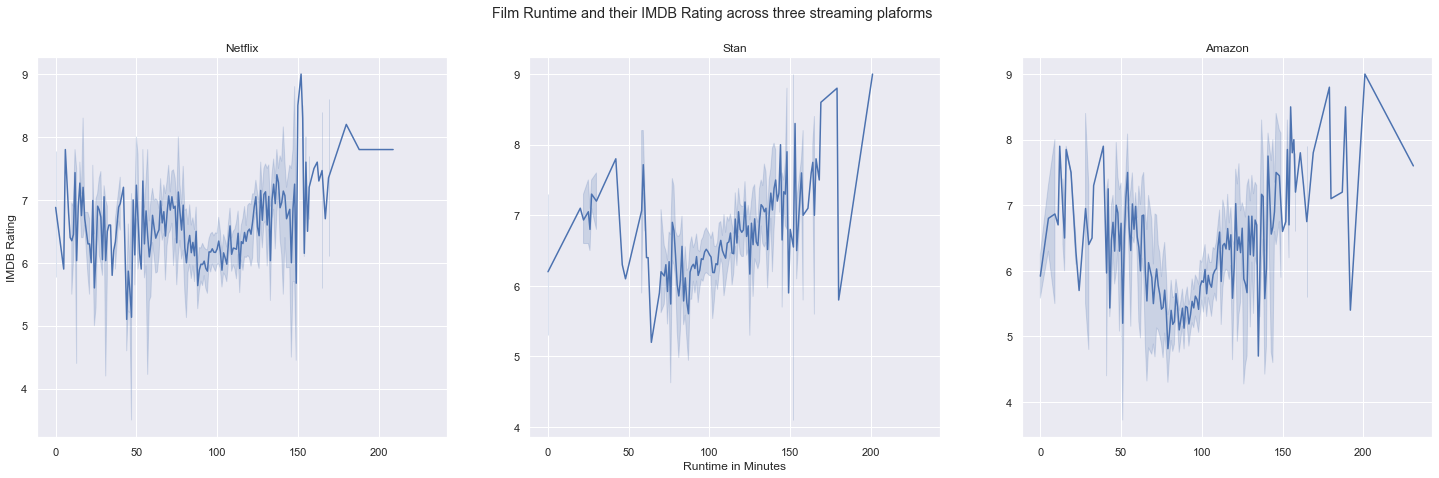

In [15]:
#What are the top 10 movies on Netflix based on IMDB?

#Runtime vs IMDB Rating

# imdb_netflix = netflix_clean.sort_values(by='imdb_rating', ascending=False, ignore_index=True)
fig2, axes= plt.subplots(1,3, figsize=(25, 7), sharex=True)
sns.lineplot(data=netflix_clean, x="runtime", y="imdb_rating", ax=axes[0]).set_title("Netflix")
sns.lineplot(data=stan_clean, x="runtime", y="imdb_rating", ax=axes[1]).set_title("Stan")
sns.lineplot(data=amazon_clean, x="runtime", y="imdb_rating", ax=axes[2]).set_title("Amazon")

axes[0].set(xlabel=None, ylabel="IMDB Rating")
axes[1].set(xlabel="Runtime in Minutes", ylabel=None)
axes[2].set(xlabel=None, ylabel=None)

fig2.suptitle("Film Runtime and their IMDB Rating across three streaming plaforms", fontsize= "large")